In [1]:
import pandas as pd
import numpy as np

In [1]:
!pip install pystan~=2.14

In [2]:
!pip install fbprophet

In [2]:
from fbprophet import Prophet

In [3]:
final_store_cat_df = pd.read_csv('final_store_cat_df.csv', index_col = 'date')

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [4]:
final_store_cat_df

,Unnamed: 0,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,...,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,...,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
2011-01-30,1,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,...,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2011-01-31,2,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,...,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
2011-02-01,3,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,...,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
2011-02-02,4,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,...,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1908,2490.0,363.0,869.0,2506.0,344.0,841.0,3286.0,534.0,1415.0,...,769.0,2290.0,326.0,626.0,3005.0,276.0,913.0,2232.0,244.0,683.0
2016-04-21,1909,2533.0,410.0,766.0,2261.0,271.0,771.0,3056.0,540.0,1422.0,...,906.0,2285.0,397.0,642.0,3078.0,281.0,1034.0,2308.0,203.0,715.0
2016-04-22,1910,2960.0,527.0,900.0,2871.0,485.0,1101.0,3409.0,598.0,1616.0,...,924.0,2790.0,415.0,786.0,3419.0,303.0,1266.0,2665.0,296.0,867.0


In [5]:
Cat_CA_1_FOODS = final_store_cat_df[['CA_1_FOODS']].copy()

In [6]:
Cat_CA_1_FOODS

,CA_1_FOODS
date,
2011-01-29,3239.0
2011-01-30,3137.0
2011-01-31,2008.0
2011-02-01,2258.0
2011-02-02,2032.0
...,...
2016-04-20,2490.0
2016-04-21,2533.0
2016-04-22,2960.0


In [7]:
Cat_CA_1_FOODS = Cat_CA_1_FOODS.reset_index()

In [8]:
df_final = Cat_CA_1_FOODS[['date', 'CA_1_FOODS']].rename({'date': 'ds', 'CA_1_FOODS':'y'},axis='columns')

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe.

In [9]:
m = Prophet()

In [10]:
m.fit(df_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -45.8762
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3991.57    0.00871916        311.86      0.7644      0.7644      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3999.14    0.00305255        82.203           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4003.85    0.00936159       114.231           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       4005.21   0.000366582       165.392   4.497e-06       0.001      493  LS failed, Hessian reset 
     381       4005.28   0.000158041       106.931   1.534e-06       0.001      580  LS failed, Hessian reset 
     399       4005.29   2.29109e-06       63.2332      0.3518           1      608   
    Iter      log pro

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [11]:
future = m.make_future_dataframe(periods = 28)

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [12]:
forecast = m.predict(future)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,2353.741704,1880.870884,2885.058656
1937,2016-05-19,2380.166077,1869.982738,2810.731470
1938,2016-05-20,2851.468359,2391.646077,3327.352045
1939,2016-05-21,3557.298870,3110.682663,4008.161436
1940,2016-05-22,3642.818547,3186.503919,4095.798892


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,2160.754129,2322.737953,3286.169087,2160.754129,2160.754129,648.122091,648.122091,648.122091,715.074695,715.074695,715.074695,-66.952604,-66.952604,-66.952604,0.0,0.0,0.0,2808.876220
1,2011-01-30,2160.380020,2441.429932,3367.450722,2160.380020,2160.380020,743.685696,743.685696,743.685696,803.711705,803.711705,803.711705,-60.026009,-60.026009,-60.026009,0.0,0.0,0.0,2904.065716
2,2011-01-31,2160.005910,1527.989166,2446.889090,2160.005910,2160.005910,-172.202387,-172.202387,-172.202387,-118.712846,-118.712846,-118.712846,-53.489541,-53.489541,-53.489541,0.0,0.0,0.0,1987.803524
3,2011-02-01,2159.631801,1183.706880,2115.067793,2159.631801,2159.631801,-485.865275,-485.865275,-485.865275,-438.450595,-438.450595,-438.450595,-47.414679,-47.414679,-47.414679,0.0,0.0,0.0,1673.766526
4,2011-02-02,2159.257692,1140.605481,2059.089309,2159.257692,2159.257692,-540.563584,-540.563584,-540.563584,-498.696116,-498.696116,-498.696116,-41.867468,-41.867468,-41.867468,0.0,0.0,0.0,1618.694108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,2849.688870,1880.870884,2885.058656,2848.816454,2850.512807,-495.947166,-495.947166,-495.947166,-498.696116,-498.696116,-498.696116,2.748949,2.748949,2.748949,0.0,0.0,0.0,2353.741704
1937,2016-05-19,2849.433069,1869.982738,2810.731470,2848.287242,2850.310862,-469.266992,-469.266992,-469.266992,-468.835154,-468.835154,-468.835154,-0.431837,-0.431837,-0.431837,0.0,0.0,0.0,2380.166077
1938,2016-05-20,2849.177268,2391.646077,3327.352045,2847.802863,2850.224398,2.291091,2.291091,2.291091,5.908311,5.908311,5.908311,-3.617220,-3.617220,-3.617220,0.0,0.0,0.0,2851.468359
1939,2016-05-21,2848.921466,3110.682663,4008.161436,2847.339391,2850.194190,708.377404,708.377404,708.377404,715.074695,715.074695,715.074695,-6.697291,-6.697291,-6.697291,0.0,0.0,0.0,3557.298870


In [15]:
forecast[['ds','yhat']].tail(50)

,ds,yhat
1891,2016-04-03,3749.258163
1892,2016-04-04,2826.174748
1893,2016-04-05,2504.719512
1894,2016-04-06,2441.771679
1895,2016-04-07,2468.035404
1896,2016-04-08,2938.390696
1897,2016-04-09,3642.493724
1898,2016-04-10,3725.517164
1899,2016-04-11,2797.060255
1900,2016-04-12,2471.006371


In [16]:
mask = (forecast['ds'] > '2016-04-24') & (forecast['ds'] <= '2016-05-22')

In [17]:
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1936     True
1937     True
1938     True
1939     True
1940     True
Name: ds, Length: 1941, dtype: bool

In [18]:
yhat_predicted = forecast.loc[mask]

In [19]:
yhat_predicted = yhat_predicted[['ds','yhat']]

In [20]:
yhat_predicted

,ds,yhat
1913,2016-04-25,2733.959182
1914,2016-04-26,2413.956579
1915,2016-04-27,2354.013169
1916,2016-04-28,2384.675684
1917,2016-04-29,2860.641214
1918,2016-04-30,3571.362145
1919,2016-05-01,3661.791591
1920,2016-05-02,2741.298868
1921,2016-05-03,2423.532681
1922,2016-05-04,2365.200385


In [21]:
yhat_Fp_CA_1_FOODS = yhat_predicted.to_csv('yhat_Fp_CA_1_FOODS.csv')

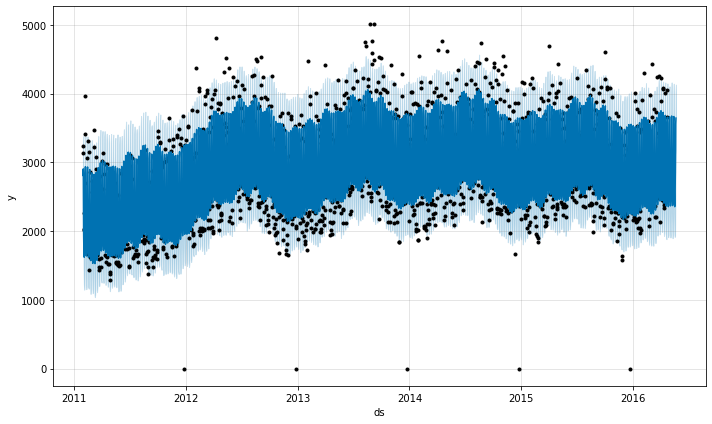

In [13]:
fig1 = m.plot(forecast)

To see the forecast components, we can use the Prophet.plot_components method. By default we’ll see the trend, yearly seasonality, and weekly seasonality of the time series.

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


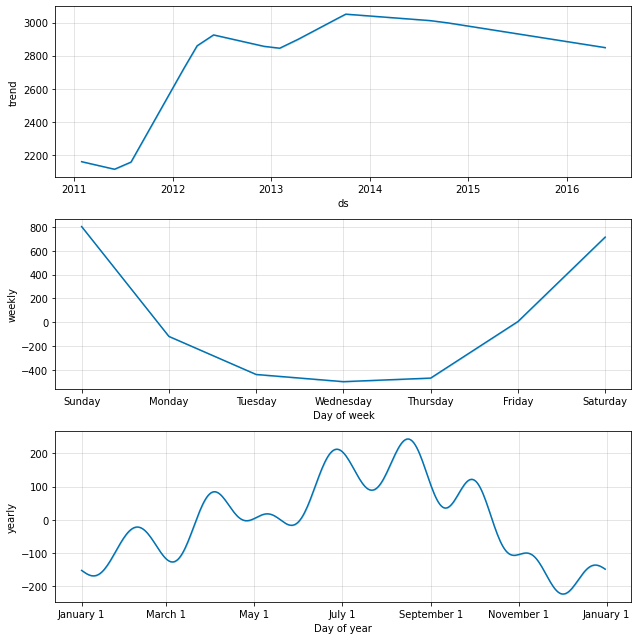

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
se = np.square(forecast.loc[:, 'yhat'] - Cat_CA_1_FOODS.loc[:, 'CA_1_FOODS'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [16]:
mse

130940.16740743427

In [17]:
rmse

361.8565563969158

In [18]:
CA_1_HOBBIES = final_store_cat_df[['CA_1_HOBBIES']].copy()

In [19]:
CA_1_HOBBIES = CA_1_HOBBIES.reset_index()

In [21]:
df_final = CA_1_HOBBIES[['date', 'CA_1_HOBBIES']].rename({'date': 'ds', 'CA_1_HOBBIES':'y'},axis='columns')

In [22]:
m = Prophet()

In [23]:
m.fit(df_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -48.3642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3543.07    0.00102939       115.714       0.217       0.217      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       3544.53    0.00033044       70.7595   4.459e-06       0.001      268  LS failed, Hessian reset 
     199       3544.54   1.06101e-06       62.0794      0.4326      0.4326      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       3544.54    5.1422e-08       54.7936     0.08459           1      309   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [24]:
future = m.make_future_dataframe(periods = 28)

In [25]:
forecast = m.predict(future)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,439.273707,421.992469,655.566018,439.273707,439.273707,109.207749,109.207749,109.207749,114.204533,114.204533,114.204533,-4.996785,-4.996785,-4.996785,0.0,0.0,0.0,548.481456
1,2011-01-30,439.158693,366.926818,588.247143,439.158693,439.158693,44.251188,44.251188,44.251188,48.884552,48.884552,48.884552,-4.633365,-4.633365,-4.633365,0.0,0.0,0.0,483.409880
2,2011-01-31,439.043678,291.187851,527.984779,439.043678,439.043678,-29.262198,-29.262198,-29.262198,-24.949386,-24.949386,-24.949386,-4.312812,-4.312812,-4.312812,0.0,0.0,0.0,409.781480
3,2011-02-01,438.928663,272.428541,492.668178,438.928663,438.928663,-51.738293,-51.738293,-51.738293,-47.727033,-47.727033,-47.727033,-4.011260,-4.011260,-4.011260,0.0,0.0,0.0,387.190371
4,2011-02-02,438.813649,266.548112,500.015286,438.813649,438.813649,-56.866511,-56.866511,-56.866511,-53.160015,-53.160015,-53.160015,-3.706497,-3.706497,-3.706497,0.0,0.0,0.0,381.947138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,558.120690,387.648618,616.187839,558.037895,558.208876,-56.819604,-56.819604,-56.819604,-53.160015,-53.160015,-53.160015,-3.659589,-3.659589,-3.659589,0.0,0.0,0.0,501.301086
1937,2016-05-19,558.216764,389.281424,618.213183,558.121194,558.315220,-54.386771,-54.386771,-54.386771,-52.123261,-52.123261,-52.123261,-2.263510,-2.263510,-2.263510,0.0,0.0,0.0,503.829993
1938,2016-05-20,558.312838,453.317365,679.137150,558.187462,558.425782,14.137320,14.137320,14.137320,14.870609,14.870609,14.870609,-0.733289,-0.733289,-0.733289,0.0,0.0,0.0,572.450159
1939,2016-05-21,558.408913,560.519646,787.523176,558.252150,558.532692,115.125424,115.125424,115.125424,114.204533,114.204533,114.204533,0.920890,0.920890,0.920890,0.0,0.0,0.0,673.534337


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,501.301086,387.648618,616.187839
1937,2016-05-19,503.829993,389.281424,618.213183
1938,2016-05-20,572.450159,453.317365,679.137150
1939,2016-05-21,673.534337,560.519646,787.523176
1940,2016-05-22,610.076105,498.573198,733.827954


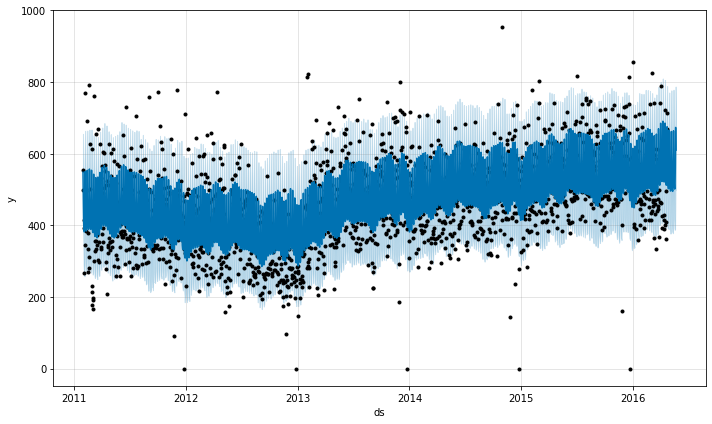

In [28]:
fig1 = m.plot(forecast)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


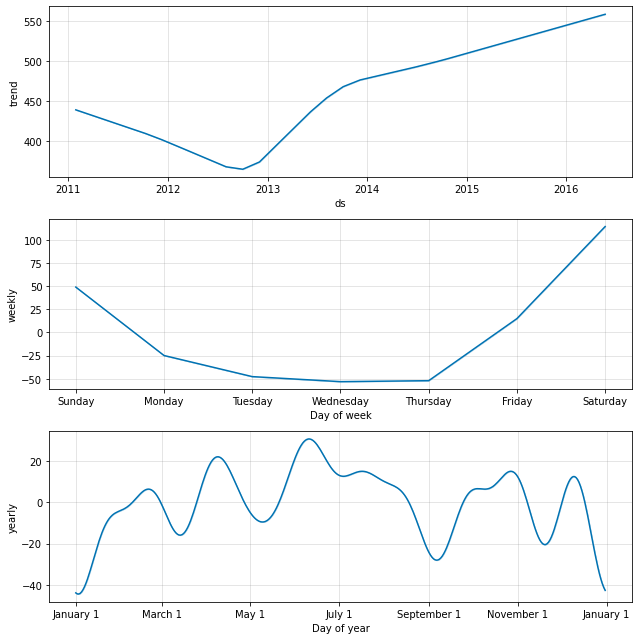

In [29]:
fig2 = m.plot_components(forecast)

In [30]:
se = np.square(forecast.loc[:, 'yhat'] - Cat_CA_1_FOODS.loc[:, 'CA_1_FOODS'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [31]:
mse

5972735.753197181

In [32]:
rmse

2443.918115076113

In [33]:
CA_1_HOUSEHOLD = final_store_cat_df[['CA_1_HOUSEHOLD']].copy()

In [35]:
CA_1_HOUSEHOLD = CA_1_HOUSEHOLD.reset_index()

In [36]:
df_final = CA_1_HOUSEHOLD[['date', 'CA_1_HOUSEHOLD']].rename({'date': 'ds', 'CA_1_HOUSEHOLD':'y'},axis='columns')

In [37]:
m = Prophet()

In [38]:
m.fit(df_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.5932
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4455.81    0.00542173       427.602           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       4456.23   0.000554815       86.1908    4.29e-06       0.001      167  LS failed, Hessian reset 
     159       4457.65   0.000660556       214.006   6.957e-06       0.001      270  LS failed, Hessian reset 
     199        4458.2    0.00261384       118.465      0.3517           1      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211        4458.4   0.000286844       176.164   3.014e-06       0.001      375  LS failed, Hessian reset 
     275       4458.87   0.000114174       99.6459   7.205e-07       0.001      502  LS failed, Hessian reset 
     299       4458.96    0.00017793        58.207      0.3717   

In [39]:
future = m.make_future_dataframe(periods = 28)

In [40]:
forecast = m.predict(future)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


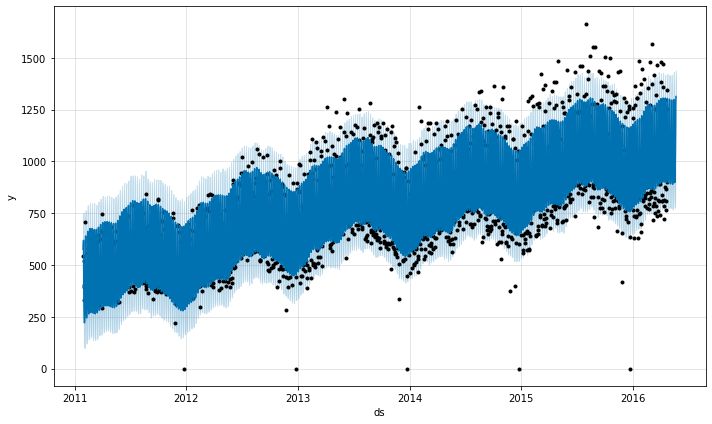

In [41]:
fig1 = m.plot(forecast)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


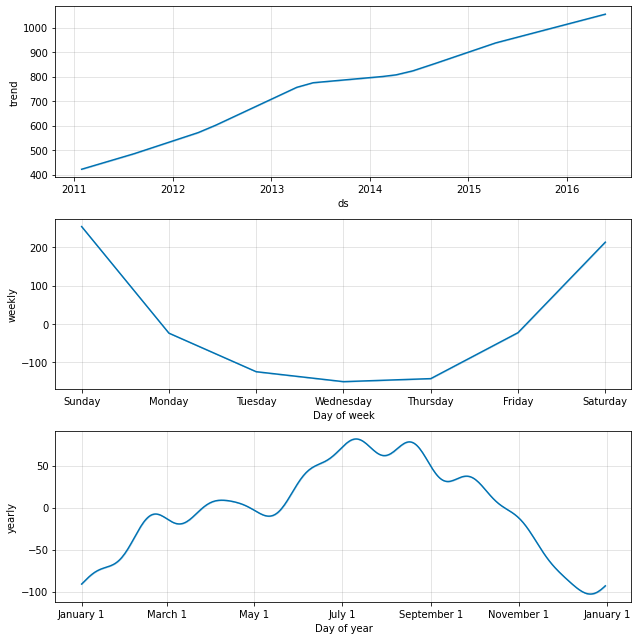

In [42]:
fig2 = m.plot_components(forecast)

In [43]:
se = np.square(forecast.loc[:, 'yhat'] - Cat_CA_1_FOODS.loc[:, 'CA_1_FOODS'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [44]:
mse

4551422.085785597

In [45]:
rmse

2133.4062167776665